In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_results = pd.read_excel("correlations.xlsx")

In [3]:
df_results.groupby(["english","latin"]).std(numeric_only=True)["corr"].shape

(12633,)

In [9]:
df_std = df_results.groupby(["english","latin"]).std(numeric_only=True)["corr"].dropna().reset_index()

In [10]:
df_std

,english,latin,corr
0,aa,semper,0.328367
1,aaron,aro,0.045478
2,aarones,aro,0.106070
3,abarn,exardeo,0.129874
4,abid,expecta,0.036315
...,...,...,...
2324,þyrste,sitiuit,0.000000
2325,þystro,obscuro,0.081438
2326,þystru,tenebrae,0.097047
2327,þystrum,tenebrae,0.125782


Text(0.5, 1.0, 'Correlation Freq.')

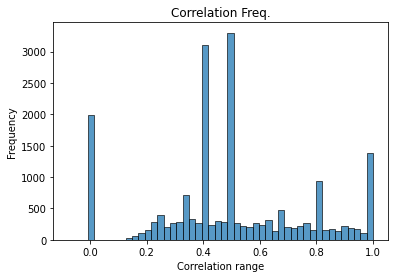

In [15]:
ax = sns.histplot(data = df_results, x="corr").set(title="histogram")
plt.xlabel('Correlation range')
plt.ylabel('Frequency')
plt.title('Correlation Freq.')

,english,latin,corr,group,manuscript
0,unrot,tristis,1.000000,2,I
1,draca,draco,1.000000,2,I
2,spearwa,passer,1.000000,2,I
3,ele,oleum,1.000000,2,I
4,chaamiscan,cham,1.000000,2,I
...,...,...,...,...,...
18930,blissian,salutaris,0.193634,2,L
18931,grund,tribulatio,0.190909,2,L
18932,na,iniquitas,0.173629,2,L
18933,forðam,exquisiui,0.173554,2,L


Text(0.5, 1.0, 'Stand. Dev. Freq.')

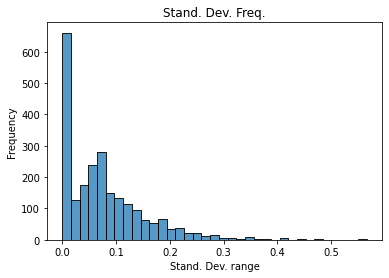

In [12]:
ax = sns.histplot(data = df_std, x="corr").set(title="histogram")
plt.xlabel('Stand. Dev. range')
plt.ylabel('Frequency')
plt.title('Stand. Dev. Freq.')

In [5]:
#Agregate manuscripts
df_results['manuscript'] = df_results[['english','latin','manuscript']].groupby(['english','latin'])['manuscript'].transform(lambda x: ','.join(x))


In [6]:
df_std = df_results.groupby(["english","latin"]).std(numeric_only=True)["corr"].reset_index()
df_std.columns=["english","latin","std"]
df_final_results = df_results.merge(df_std,on=["english","latin"],how="left")
df_final_results = df_final_results.drop_duplicates(subset=["english","latin"],keep="first")
df_final_results = df_final_results.query("std<0.2 or std!=std")
df_final_results = df_final_results.query("corr>0.6").sort_values(by=["corr"],ascending=False)
df_final_results = df_final_results.fillna(0)


In [7]:
df_final_results.shape

(2228, 6)

In [10]:
df_final_results.sample(40)

,english,latin,corr,group,manuscript,std
10007,cennan,gigno,0.816329,1,C,0.000000
180,gefea,gaudium,0.749589,2,"I,D,G,C,J,B,F,H,L",0.104232
9930,smyryde,ungo,1.000000,1,C,0.000000
11655,abid,expecta,1.000000,1,"J,B",0.036315
160,geswinc,labor,0.768868,2,"I,D,G,E,C,J,F,K,H",0.133683
11133,ymbhwirfte,circuitus,0.638241,2,J,0.000000
15822,drygnesse,conuertam,0.632161,1,K,0.000000
5553,earþu,tristis,0.670216,2,A,0.000000
4566,iosep,ioseph,0.894244,2,G,0.000000
5205,wiþcwedenisse,contradictio,1.000000,2,A,0.000000
